## train 1K, test 1K, SVM

In [87]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [88]:
train = pd.read_csv('../Data/train_1k.csv', header=None)
test = pd.read_csv('../Data/test_1k.csv', header=None)
print(train.head())
print(test.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

In [89]:
# train 정답의 숫자 빈도 확인
train[0].value_counts().sort_index()

0     98
1    116
2     99
3     93
4    105
5     92
6     94
7    117
8     87
9    100
Name: 0, dtype: int64

In [90]:
# train data의 내용 보기
temp = np.array(train.loc[0, train.columns != 0])
print(temp)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [91]:
tempColumns = []
temp1 = temp.reshape(28,28)
count = 0

for i in range(0, 29):
    if i % 2  == 1:
        for j in range(0, 29):
            if j % 2 == 1:
                tempColumns.append(temp1[i,j])
                count += 1
count

196

In [92]:
np.sqrt(196)

14.0

In [93]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [94]:
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:, train.columns != 0]
test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:, test.columns != 0]

In [95]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [96]:
clf.score(test_data, test_label)

0.8751248751248751

In [97]:
plt.scatter(train_data.index, train_data[300])
plt.show()

### 로그 변환
큰값을 작은 값으로 표시

기본적으로 log안의 x값은 양수만 가능하다.       
하지만 0에 가까운 아주 작은 양수의 경우 (ex: 0.0000000000001)       
음의 무한대에 가까워지게 된다. (너무 작은값의 경우 프로그램 계산이 -inf)        
이를 방지하게 위해 1을 더함으로써 0보다 큰 양수의 값을 갖게 된다.

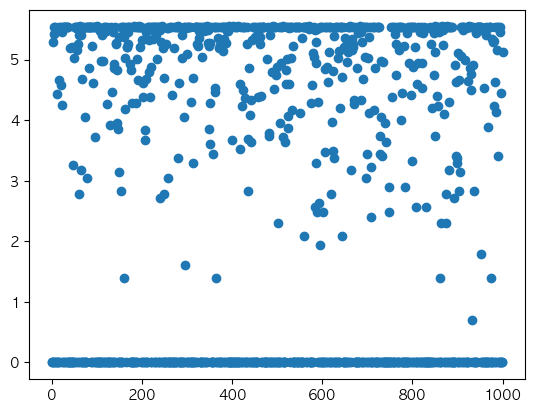

In [98]:
plt.scatter(train_data.index, np.log1p(train_data[300]))
plt.show()

In [99]:
# data의 표준화
train = pd.DataFrame(np.log1p(train_data))
test = pd.DataFrame(np.log1p(test_data))

In [100]:
train_data = train.loc[:, train_data.columns != 0]
test_data = test.loc[:, test_data.columns != 0]

In [101]:
clf = svm.SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.8901098901098901

## train10K와 test1K, SVM, Log

In [102]:
train = pd.read_csv('../Data/train_10k.csv', header=None)
test = pd.read_csv('../Data/test_1k.csv', header=None)

In [103]:
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:, train.columns != 0]
test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:, test.columns != 0]

In [104]:
clf = svm.SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9470529470529471

In [105]:
train = pd.DataFrame(np.log1p(train_data))
test = pd.DataFrame(np.log1p(test_data))
train_data = train.loc[:, train_data.columns != 0]
test_data = test.loc[:, test_data.columns != 0]

In [106]:
clf = svm.SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.958041958041958

## train20K와 test1K, SVM, Log

In [107]:
train = pd.read_csv('../Data/train_20k.csv', header=None)
test = pd.read_csv('../Data/test_1k.csv', header=None)

In [108]:
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:, train.columns != 0]
test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:, test.columns != 0]

In [109]:
clf = svm.SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9630369630369631

In [110]:
train = pd.DataFrame(np.log1p(train_data))
test = pd.DataFrame(np.log1p(test_data))
train_data = train.loc[:, train_data.columns != 0]
test_data = test.loc[:, test_data.columns != 0]

In [111]:
clf = svm.SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.965034965034965